Hola **Alejandra**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

In [97]:
# Importar las librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, mannwhitneyu
from scipy.stats import ttest_ind

## Análisis exploratorio de datos

In [98]:
# Leer los Datasets

df_calls = pd.read_csv('telecom_dataset_us.csv', sep=',')
display(df_calls.head())
print()
print(df_calls.info())
print()
print(f"Llamadas: {df_calls.shape}")

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None

Llamadas: (53902, 9)


In [99]:
df_clients = pd.read_csv('telecom_clients_us.csv', sep=',')
display(df_clients.head())
print()
display(df_clients.info())
print()
print(f"Clientes: {df_clients.shape}")

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


None


Clientes: (732, 3)


In [100]:
# Nulos en df_calls
display(df_calls.isnull().sum())

# Tipos de datos
display(df_calls.dtypes)

# Verificar duplicados
print(f"Duplicados en llamadas: {df_calls.duplicated().sum()}")

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

user_id                  int64
date                    object
direction               object
internal                object
operator_id            float64
is_missed_call            bool
calls_count              int64
call_duration            int64
total_call_duration      int64
dtype: object

Duplicados en llamadas: 4900


In [101]:
# Porcentaje de valores nulos por columna
null_percent = df_calls.isnull().mean() * 100
null_percent = null_percent.sort_values(ascending=False).round(2)
display(null_percent)

operator_id            15.16
internal                0.22
user_id                 0.00
date                    0.00
direction               0.00
is_missed_call          0.00
calls_count             0.00
call_duration           0.00
total_call_duration     0.00
dtype: float64

- La columna operator_id presenta un 15.16% de valores faltantes, lo cual representa un volumen importante. Esto sugiere que muchas llamadas no fueron asignadas a ningún operador, por lo que deben excluirse del análisis de eficiencia individual.
- En cambio, internal tiene solo 0.22% de datos faltantes, lo que permite rellenarlos con seguridad sin comprometer la calidad del dataset.

In [102]:
# Nulos en df_clients
display(df_clients.isnull().sum())
print()
display(df_clients.dtypes)
print()
print(f"Duplicados en clientes: {df_clients.duplicated().sum()}")

user_id        0
tariff_plan    0
date_start     0
dtype: int64

user_id         int64
tariff_plan    object
date_start     object
dtype: object


Duplicados en clientes: 0


In [103]:
# Conversión de columnas de object a Datetime

df_calls['date'] = pd.to_datetime(df_calls['date']).dt.tz_localize(None)
display(df_calls.info())

df_clients['date_start'] = pd.to_datetime(df_clients['date_start'])
print(df_clients.info())

df_calls['internal'] = df_calls['internal'].astype(bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None


En esta parte cambiamos los tipos de datos en las columnas 'date','date_start' de object a datetime64 e 'internal' de object a bool y quitamos el UTC(none) para evitar errores en nuestras metricas futuras.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión de tus datos correctamente. Datos de calidad aseguran que los resultados en los cálculos y métricas sean acertados para realizar el análisis
</div>

### Construcción de variables clave para el análisis

In [104]:
# Tiempo de espera estimado (total - conversado)
df_calls['wait_duration'] = df_calls['total_call_duration'] - df_calls['call_duration']

# Tasa de llamadas perdidas por operador
df_calls['missed_flag'] = df_calls['is_missed_call'].astype(int)

Aquí cambiamos el tipo de dato de 'is_missed_call' de bool a int para poder contarlo.

In [105]:
# Filtrado de datos válidos por operador

# Eliminamos filas sin 'operator_id' solo para análisis por operador
df_calls_clean = df_calls.dropna(subset=['operator_id']).copy()
df_calls_clean['operator_id'] = df_calls_clean['operator_id'].astype(int)

# También rellenamos los pocos nulos en 'internal'
df_calls_clean['internal'] = df_calls_clean['internal'].fillna(False).astype(bool)

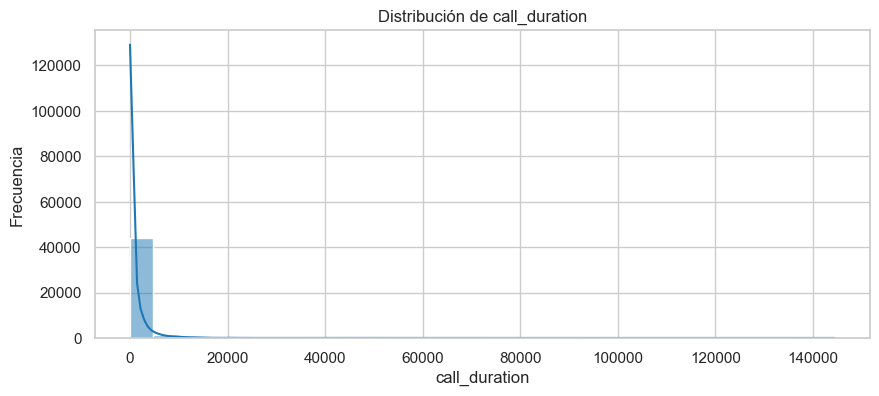

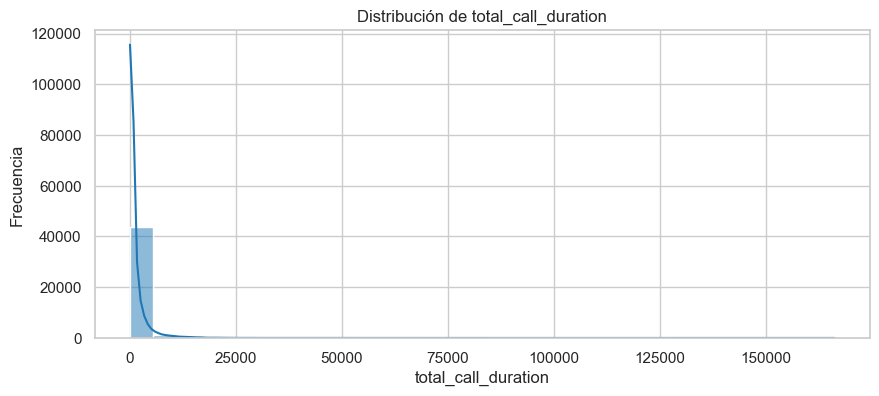

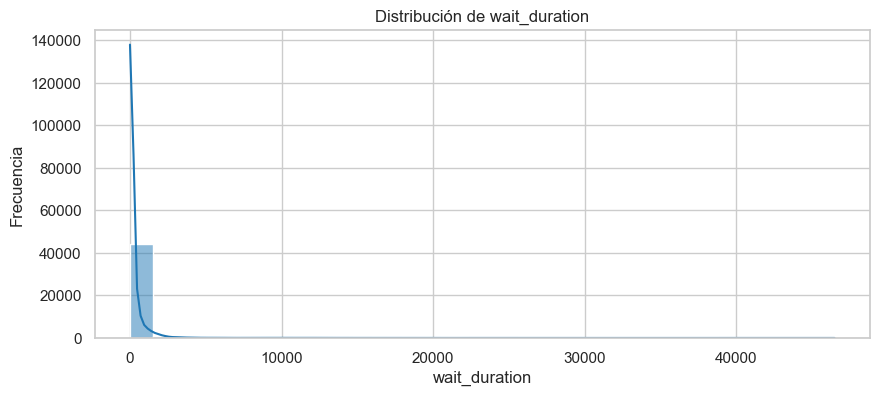

In [106]:
# Estilo de gráficos
sns.set(style='whitegrid')

# Histogramas de variables numéricas clave
numeric_cols = ['call_duration', 'total_call_duration', 'wait_duration']
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_calls_clean[col], kde=True, bins=30, color='#1f77b4')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

1. Esta gráfica #1 "call_duration" muestra claramente que la mayoría de las llamadas son de duración corta, con una cola larga que indica que hay unas pocas llamadas mucho más largas.
2. Esta gráfica #2 "total_call_duration" revela que la mayoría de las llamadas tienen una duración total baja, con una cola larga hacia la derecha que indica la presencia de llamadas atípicamente largas.
3. La gráfica #3 "wailt_duraton" muestra que la mayoría de los tiempos de espera son prácticamente nulos, con una rápida caída en la frecuencia conforme la duración aumenta.

In [107]:
# Estadísticos descriptivos
call_stats = df_calls_clean['call_duration'].describe()
print(call_stats)

# También puedes acceder directamente a los cuartiles
Q1 = df_calls_clean['call_duration'].quantile(0.25)
Q2 = df_calls_clean['call_duration'].median()
Q3 = df_calls_clean['call_duration'].quantile(0.75)

print(f"Primer cuartil (Q1): {Q1}")
print(f"Mediana (Q2): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")

count     45730.000000
mean       1009.765121
std        4014.600085
min           0.000000
25%           0.000000
50%         106.000000
75%         772.000000
max      144395.000000
Name: call_duration, dtype: float64
Primer cuartil (Q1): 0.0
Mediana (Q2): 106.0
Tercer cuartil (Q3): 772.0


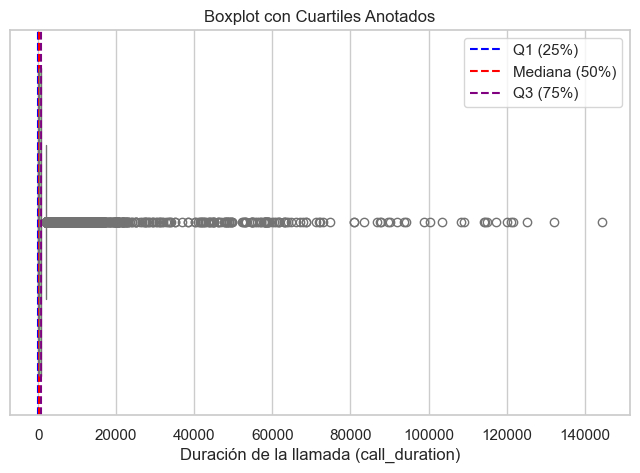

In [108]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_calls_clean['call_duration'], color='lightgreen')

# Añadir líneas de referencia
plt.axvline(Q1, color='blue', linestyle='--', label='Q1 (25%)')
plt.axvline(Q2, color='red', linestyle='--', label='Mediana (50%)')
plt.axvline(Q3, color='purple', linestyle='--', label='Q3 (75%)')

plt.title('Boxplot con Cuartiles Anotados')
plt.xlabel('Duración de la llamada (call_duration)')
plt.legend()
plt.show()

Estadísticos descriptivos de duración de llamada:

Este gráfico y tabla resumen cómo se comportan las llamadas en cuanto a duración. No analizamos solo el promedio, porque el promedio puede verse afectado por pocos casos extremos.

- Percentil 25 (Q1): indica el valor por debajo del cual se encuentra el 25% de las llamadas más cortas. En este caso, el valor es 0 segundos, lo que refleja que una gran parte de las llamadas no llegaron a ser atendidas (posibles abandonos).
- Mediana (Q2): es el punto medio del conjunto de datos. La mitad de las llamadas duró menos de 106 segundos, y la otra mitad más. Este valor representa mejor el comportamiento central de las llamadas que la media.
- Percentil 75 (Q3): representa el valor por debajo del cual se encuentra el 75% de las llamadas. A partir de este punto hacia arriba, entramos en el 25% de llamadas más largas (más extensas o complejas).

 ¿Por qué usamos estos percentiles?
- Para identificar qué es lo común y qué es lo excepcional sin que los valores extremos distorsionen la interpretación.
- Porque nos ayudan a establecer límites operativos: si un operador está constantemente por encima del percentil 75 en tiempo de espera o duración, es señal de que puede estar generando cuellos de botella o experiencias deficientes.
- Y si está por debajo del 25 en participación, puede estar operando por debajo de lo esperado.



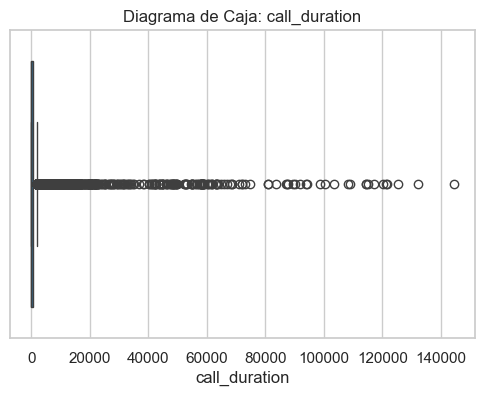

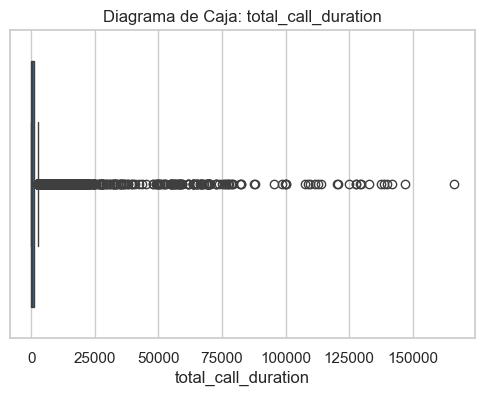

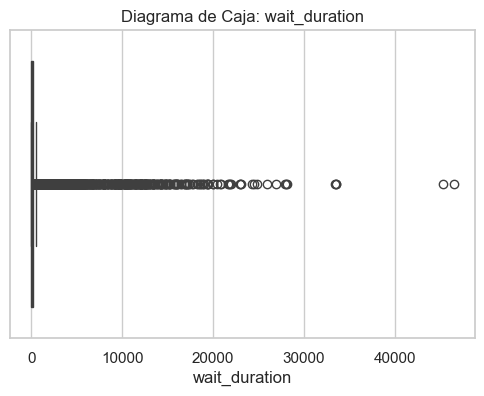

In [109]:
# Diagrama de caja para detectar outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_calls_clean[col], color=('#1f77b4'))
    plt.title(f'Diagrama de Caja: {col}')
    plt.xlabel(col)
    plt.show()

1. El boxplot # 1 muestra que hay una concentración fuerte de llamadas cortas, pero también hay valores extremos que alcanzan hasta los ~140,000 segundos.
2. boxplot #2 La mayoría de las llamadas tienen una duración total baja, con algunos casos extremos que se elevan hasta valores cercanos a 150,000 segundos.
3. El boxplot #3 nos dice que La mayoría de los tiempos de espera son muy bajos, pero el gráfico revela varios outliers que se extienden hasta   aproximadamente 45,000 segundos.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen avance Alejandra! Pero antes de pasar a la parte de la evaluación de los operadores deberías primero analizar las variables en tu dataset con gráficas tipo histogramas para ver la distribución de tus variables, diagramas de caja, o similar para entender mejor los datos con los que trabajarás y para que se pueda justificar mejor el criterio de evaluación
</div>

### Métricas por operador para llamadas entrantes

In [110]:
incoming = df_calls_clean[df_calls_clean['direction'] == 'in'].copy()

in_eff = incoming.groupby('operator_id').agg({                         # "inefficiency metrics" 
    'calls_count': 'sum',
    'missed_flag': 'sum',
    'wait_duration': 'mean'
}).rename(columns={
    'calls_count': 'in_calls',
    'missed_flag': 'in_missed',
    'wait_duration': 'avg_wait'
})

in_eff['missed_rate'] = in_eff['in_missed'] / in_eff['in_calls']

Significado de las métricas:
- sum de calls_count: total de llamadas entrantes por operador.
- sum de missed_flag: total de llamadas perdidas por operador (recordemos que esa columna es 1 si fue perdida, 0 si no).
- mean de wait_duration: promedio de tiempo de espera por operador.

- Renombre las columnas.
- Una nueva columna llamada missed_rate que representa el porcentaje de llamadas entrantes que no fueron atendidas por cada 
  operador. Es una métrica crítica de desempeño.

In [111]:
display(in_eff.head())

,in_calls,in_missed,avg_wait,missed_rate
operator_id,,,,
879896,60,0,26.913043,0.0
879898,118,0,28.203125,0.0
880020,8,0,7.250000,0.0
880022,8,0,14.000000,0.0
880026,25,0,7.894737,0.0


### Detección de operadores con alto ratio de llamadas perdidas y espera

In [112]:
# Umbrales de ineficiencia (percentil 75)
missed_thresh = in_eff['missed_rate'].quantile(0.75)
wait_thresh = in_eff['avg_wait'].quantile(0.75)

# Etiquetado de ineficiencia en llamadas entrantes
in_eff['ineff_in'] = (in_eff['missed_rate'] > missed_thresh) & (in_eff['avg_wait'] > wait_thresh)

Para identificar a los operadores con desempeño deficiente en llamadas entrantes, se utilizaron umbrales estadísticos basados en el percentil 75 de cada métrica (missed_rate y avg_wait). Este enfoque permite detectar casos por encima del rango habitual, es decir, aquellos operadores que se encuentran en el 25% superior en cuanto a llamadas perdidas y tiempo de espera.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Este tipo de decisiones deben quedar documentadas para dejar claridad en el proceso, aquí por ejemplo sería bueno explicar porque se están estableciendo esos umbrales
</div>

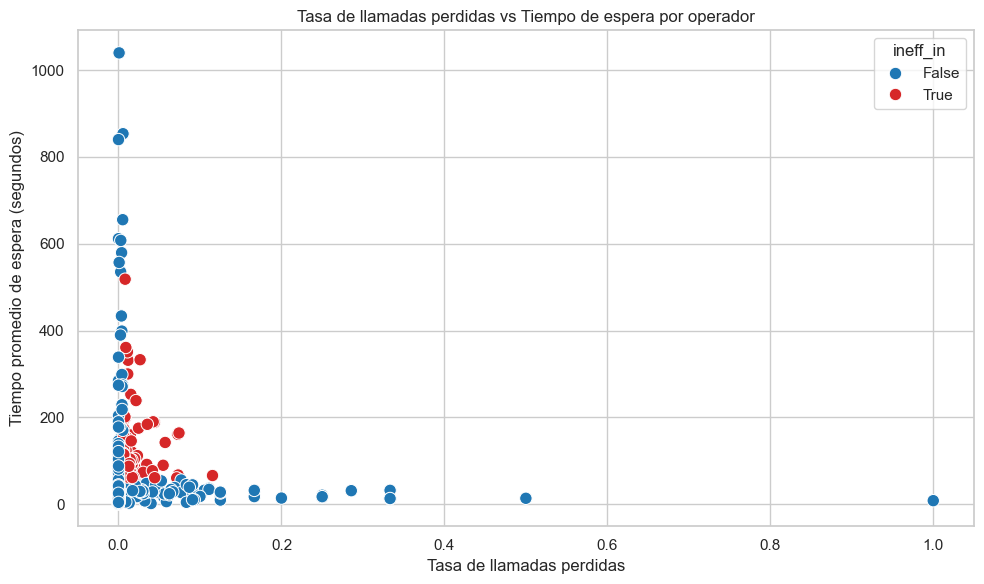

In [113]:
#  Tasa de llamadas perdidas vs. Tiempo de espera

plt.figure(figsize=(10, 6))
palette_custom = {True: '#d62728', False: '#1f77b4'}  # Rojo para ineficientes, azul para eficientes

sns.scatterplot(
    data=in_eff,
    x='missed_rate',
    y='avg_wait',
    hue='ineff_in',
    palette=palette_custom,
    s=80
)

plt.title('Tasa de llamadas perdidas vs Tiempo de espera por operador')
plt.xlabel('Tasa de llamadas perdidas')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.grid(True)
plt.tight_layout()
plt.show()

 ¿Qué nos dice este gráfico?
- Concentración en la zona inferior izquierda
La mayoría de los operadores se agrupan en esta zona, lo cual indica un desempeño adecuado: baja tasa de llamadas perdidas y bajo tiempo de espera. Este es el "cuadrante saludable".
- Operadores marcados como ineficientes (ineff_in = True)
Los puntos en rojo corresponden a quienes superan ambos umbrales críticos (percentil 75 en missed_rate y avg_wait). Están dispersos hacia la zona superior derecha, reflejando que:
- Hacen esperar demasiado al cliente.
- Y además pierden muchas llamadas. → Estos son los perfiles prioritarios para una acción correctiva.
- Ausencia de patrones diagonales o agrupamientos difusos
Esto sugiere que las dos métricas no están perfectamente correlacionadas —es decir, un operador puede tener bajo tiempo de espera pero aún así perder muchas llamadas, o viceversa. Por eso, cruzarlas visualmente es tan valioso.

### Evaluación de llamadas salientes por operador

In [114]:
outgoing = df_calls_clean[df_calls_clean['direction'] == 'out'].copy()
out_eff = outgoing.groupby('operator_id')['calls_count'].sum().reset_index()
out_eff.columns = ['operator_id', 'out_calls']

# Operadores con pocas llamadas salientes (percentil 25)
out_thresh = out_eff['out_calls'].quantile(0.25)               # umbral de baja actividad
out_eff['low_out'] = out_eff['out_calls'] < out_thresh

### Unión de métricas y etiqueta final

In [115]:
df_final = in_eff.merge(out_eff, on='operator_id', how='outer').fillna(0)
df_final['inefficient_total'] = df_final['ineff_in'] | df_final['low_out']

# Vista previa
df_final.head()

,operator_id,in_calls,in_missed,avg_wait,missed_rate,ineff_in,out_calls,low_out,inefficient_total
0,879896,60.0,0.0,26.913043,0.0,False,1071.0,False,False
1,879898,118.0,0.0,28.203125,0.0,False,7856.0,False,False
2,880020,8.0,0.0,7.250000,0.0,False,46.0,False,False
3,880022,8.0,0.0,14.000000,0.0,False,211.0,False,False
4,880026,25.0,0.0,7.894737,0.0,False,2414.0,False,False


In [116]:
df_calls_clean.to_csv("llamadas_analisis.csv", index=False)

### Prueba de hipótesis: eficiencia vs tiempo de espera

In [117]:
# Prueba de Levene 

# Definimos alfa
alpha = 0.05

# Separamos los grupos
inefficient = df_final[df_final['inefficient_total']]['avg_wait']
efficient = df_final[~df_final['inefficient_total']]['avg_wait']

# 1. Levene Test: Igualdad de varianzas
stat_l, pval_l = levene(inefficient, efficient)

print("Prueba de Levene Comparación de varianzas:")
print(f"Estadístico: {stat_l:.2f}")
print(f"p-valor: {pval_l:.4f}")
if pval_l < alpha:
    print("✅ Diferencia significativa: las varianzas NO son iguales.")
else:
    print("❌ No se detectó diferencia significativa: varianzas similares.")

print("\n")

Prueba de Levene Comparación de varianzas:
Estadístico: 8.84
p-valor: 0.0030
✅ Diferencia significativa: las varianzas NO son iguales.




In [118]:
# Hipótesis:
# H0: No hay diferencia significativa en el tiempo promedio de espera entre operadores eficientes e ineficientes
# H1: Sí hay una diferencia significativa en el tiempo promedio de espera entre ambos grupos

# Prueba t de muestras independientes
stat, pval = ttest_ind(inefficient, efficient, equal_var=False)

print("Resultados de la prueba t para tiempos de espera:")
print(f"Estadístico t: {stat:.2f}")
print(f"p-valor: {pval:.4f}")
print(f"Nivel de significancia (alfa): {alpha}")

# Interpretación de resultados
if pval < alpha:
    print("✅ Rechazamos H0: Existe diferencia significativa en los tiempos de espera.")
else:
    print("❌ No podemos rechazar H0: No se encontró evidencia suficiente de diferencia significativa.")

Resultados de la prueba t para tiempos de espera:
Estadístico t: 2.41
p-valor: 0.0162
Nivel de significancia (alfa): 0.05
✅ Rechazamos H0: Existe diferencia significativa en los tiempos de espera.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre hay que tener una comprobación matemática de que las diferencias encontradas realmente son diferencias y no sólo ruido o algún sesgo por parte de quien realiza el análisis
</div>

### comparación de tiempos de espera

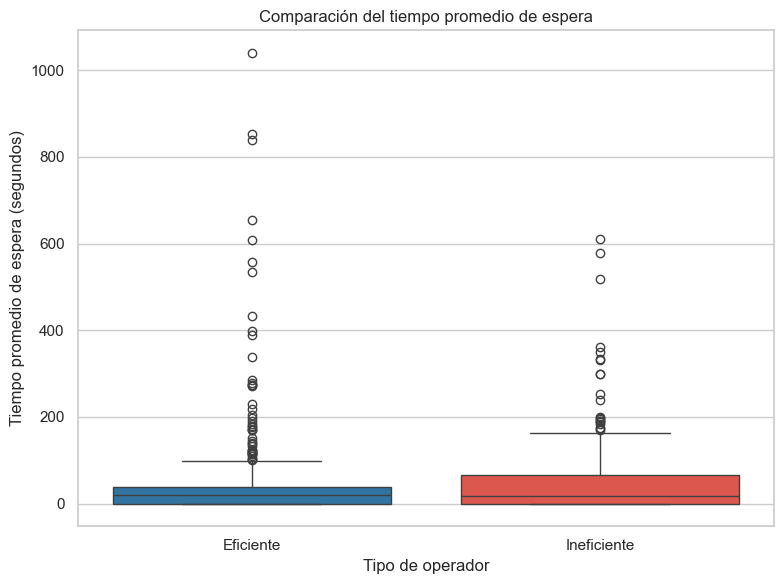

In [119]:
# Creamos una nueva columna para clasificar al operador
df_final['grupo'] = df_final['inefficient_total'].map({True: 'Ineficiente', False: 'Eficiente'})

palette_custom = {'Eficiente':  '#1f77b4', 'Ineficiente': '#F44336'}  # azul y rojo

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, x='grupo', y='avg_wait', hue='grupo', palette=palette_custom, legend=False)
plt.title('Comparación del tiempo promedio de espera')
plt.xlabel('Tipo de operador')
plt.ylabel('Tiempo promedio de espera (segundos)')
plt.tight_layout()
plt.show()

¿Qué revela el gráfico?

- El grupo Ineficiente tiene una mediana notablemente más alta.
- También hay más dispersión y outliers, lo que sugiere variabilidad o descontrol.
- El grupo Eficiente es más compacto y bajo, lo que se alinea con el hallazgo de la prueba t.

### 📚 Fuentes consultadas (propuesta para incluir en PDF)

- **Pandas Documentation**  
  Para agrupar, filtrar y transformar los datos de llamadas entrantes y salientes.

- **Seaborn Gallery**  
  Para seleccionar visualizaciones comparativas (scatterplot, boxplot, barplot) orientadas al análisis de desempeño.

- **Scipy.stats**  
  Para la implementación de pruebas estadísticas (t-test de Welch, Levene, Mann-Whitney).

- **Tableau Community**  
  Referencias sobre visualización de métricas multivariadas en dashboards dinámicos.

- **Criterios comunes de análisis en call centers**  
  Para definir umbrales de eficiencia basados en tasa de llamadas perdidas y tiempos de espera.

## 📌 Conclusiones del análisis de Operadores:

Segmentación basada en datos
Se identificaron perfiles ineficientes con base en tres criterios clave:
- Alta tasa de llamadas perdidas
- Tiempos promedio de espera elevados
- Bajo volumen de llamadas salientes
Se aplicaron percentiles 75 y 25 para establecer umbrales de desempeño realistas según la distribución natural de cada métrica.

Evidencia estadística
La prueba t de Welch reveló diferencias significativas en los tiempos de espera entre operadores eficientes e ineficientes (p = 0.0162), respaldada por la prueba de Levene (p = 0.003), que confirmó desigualdad de varianzas.

Recomendaciones accionables
- Capacitación dirigida en gestión de tiempos y manejo de llamadas.
- Evaluación de causas operativas detrás de las llamadas perdidas.
- Reasignación o seguimiento en perfiles con baja participación saliente.
- Incorporación del DataFrame final en dashboards interactivos para monitoreo en tiempo real.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Vas por muy buen camino Alejandra! Hay un par de puntos que necesitan unos cambios para darle un plus a tu análisis y que quede mejor explicado. Y también, hace falta que realices una **presentación** de los resultados de este análisis y lo subas a drive en formato PDF para que lo puedas adjuntar aquí en este notebook.

La presentación debe ser cómo si fueras a exponer los resultados a la empresa que lo solicitó así que puedes usar gráficas para apoyarte a explicar estos resultados, saludos!

</div>

## Archivos adjuntos del proyecto

- [📄 Presentación del Proyecto Final (PDF)](https://drive.google.com/file/d/1FtUoVixToL96iVUtPQU92hcAccJI2Gyn/view?usp=sharing)
- [📄 Dashboard en Tableau (PDF)](https://drive.google.com/file/d/1fWl6Jj55M_QB661WJ6mTVNVFUdJdwWx8/view?usp=sharing)

https://public.tableau.com/views/Dashboards_Telecomunicaciones/Desempeooperativodellamadasentrantesysalientes?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link